In [1]:
import sys
print (sys.version)
import pandas as pd
import quandl as qd
import numpy as np
import math
from sklearn import preprocessing, cross_validation, svm
from sklearn.linear_model import LinearRegression
%matplotlib notebook
import matplotlib.pyplot as plt
import datetime

3.5.2 |Anaconda custom (64-bit)| (default, Jul  5 2016, 11:41:13) [MSC v.1900 64 bit (AMD64)]


C:\Users\User\Anaconda2\envs\py3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = qd.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [3]:
df = df[['Adj. Open','Adj. High','Adj. Low','Adj. Close','Adj. Volume']]
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0
df['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0
df.head()

,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,HL_PCT,PCT_change
Date,,,,,,,
2004-08-19,50.159839,52.191109,48.128568,50.322842,44659000.0,3.712563,0.324968
2004-08-20,50.661387,54.708881,50.405597,54.322689,22834300.0,0.710922,7.227007
2004-08-23,55.551482,56.915693,54.693835,54.869377,18256100.0,3.729433,-1.227880
2004-08-24,55.792225,55.972783,51.945350,52.597363,15247300.0,6.417469,-5.726357
2004-08-25,52.542193,54.167209,52.100830,53.164113,9188600.0,1.886792,1.183658


In [5]:
df = df[['Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


Be aware about bias classifier!!

We have just create features, now Labels

In [6]:
forecast_col = 'Adj. Close'

In [7]:
df.fillna(-99999,inplace=True)

## Regression algorithm

In [8]:
forecast_out = int(math.ceil(0.01*len(df)))
forecast_out

33

In [9]:
forecast_col

'Adj. Close'

Now we need label

In [10]:
df['label'] = df[forecast_col].shift(-forecast_out)

In [11]:
df.dropna(inplace=True)
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label
Date,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,68.752232
2004-08-20,54.322689,0.710922,7.227007,22834300.0,69.639972
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,69.078238
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,67.839414
2004-08-25,53.164113,1.886792,1.183658,9188600.0,68.912727


In [12]:
X = np.array(df.drop(['label'],1))
Y = np.array(df['label'])

In [13]:
X = preprocessing.scale(X)

In [14]:
Y = np.array(df['label'])
len(X),len(Y)

(3178, 3178)

Let's test it

In [15]:
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size=0.2)

classifier

In [16]:
clf = LinearRegression()
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
accuracy

0.96866476760495712

In [17]:
clf = svm.SVR(kernel='poly') # vector machine
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
accuracy

0.73230713745500586

run parallel

In [18]:
clf = LinearRegression(n_jobs=10)
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
accuracy

0.96866476760495712

In [19]:
clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
accuracy

0.96866476760495712

## Regression forecasting and predicting - Practical Machine Learning Tutorial with Python p.5

In [20]:
df['label'] = df[forecast_col].shift(-forecast_out)
X = np.array(df.drop(['label'],1))
X = preprocessing.scale(X)
X_lately = X[-forecast_out:]
X = X[:-forecast_out]

df.dropna(inplace=True)
Y = np.array(df['label'])


X_train, X_test, Y_train, Y_test = cross_validation.train_test_split(X,Y,test_size=0.2)

clf = LinearRegression(n_jobs=-1)
clf.fit(X_train,Y_train)
accuracy = clf.score(X_test,Y_test)
accuracy

0.96993579745260461

## Let's predict the next 33 days
X are the features

Y are the labels

In [21]:
forecast_set = clf.predict(X_lately)
forecast_set,accuracy,forecast_out

(array([ 844.92685699,  849.91485035,  853.97310762,  856.78644762,
         858.79104756,  858.64322239,  855.57406449,  857.24727366,
         852.57042974,  863.85506902,  857.51900524,  856.8822622 ,
         855.05802594,  858.65341791,  861.23981043,  865.08117751,
         868.95789123,  871.90085999,  873.43722167,  875.89613932,
         877.55013276,  879.66646398,  875.36975681,  856.60647823,
         857.09970809,  846.61339471,  842.38056725,  845.24338866,
         847.96160475,  857.038403  ,  857.39856361,  855.36846328,
         863.54121876]), 0.96993579745260461, 33)

In [22]:
df['Forecast'] = np.nan
last_day = df.iloc[-1].name
last_day

Timestamp('2017-02-14 00:00:00')

In [23]:
last_unix = last_day.timestamp()
oneDay = 24*60*60 # seconds in a day
next_unix = last_unix + oneDay

## Let's populate

In [33]:
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += oneDay
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] #referencing the index of next day and if not exist it creates it
df.head()


,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0,68.752232,NaN
2004-08-20,54.322689,0.710922,7.227007,22834300.0,69.639972,NaN
2004-08-23,54.869377,3.729433,-1.227880,18256100.0,69.078238,NaN
2004-08-24,52.597363,6.417469,-5.726357,15247300.0,67.839414,NaN
2004-08-25,53.164113,1.886792,1.183658,9188600.0,68.912727,NaN


In [34]:
df.tail()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume,label,Forecast
Date,,,,,,
2017-12-04,NaN,NaN,NaN,NaN,NaN,847.961605
2017-12-05,NaN,NaN,NaN,NaN,NaN,857.038403
2017-12-06,NaN,NaN,NaN,NaN,NaN,857.398564
2017-12-07,NaN,NaN,NaN,NaN,NaN,855.368463
2017-12-08,NaN,NaN,NaN,NaN,NaN,863.541219


https://youtu.be/QLVMqwpOLPk?t=9m26s

http://stackoverflow.com/questions/31593201/pandas-iloc-vs-ix-vs-loc-explanation

<IPython.core.display.Javascript object>


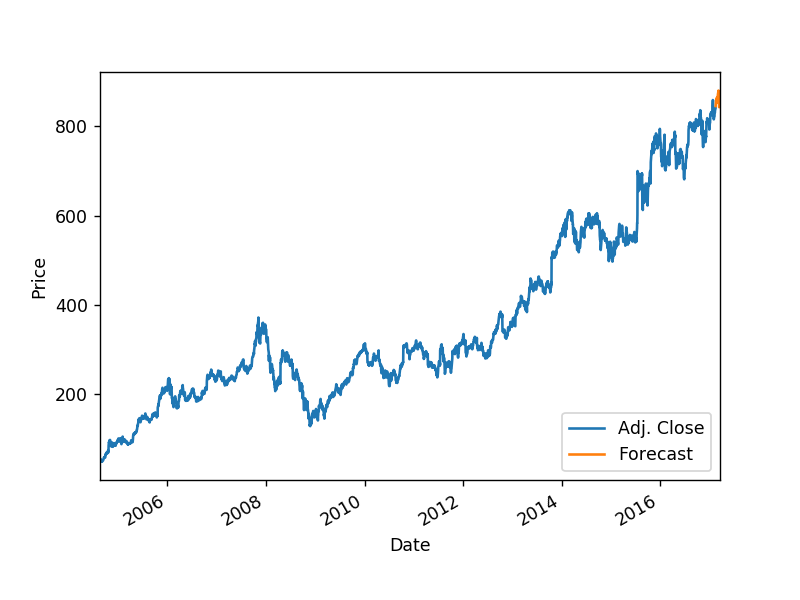

In [25]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

## Pickling and Scaling - Practical Machine Learning Tutorial with Python p.6

pickle is serialization

In [35]:
import pickle

save the classifier, aoid to train everytime the algorithm

In [36]:
with open('linearregression.pickle','wb') as f:
    pickle.dump(clf,f)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

spin up a server